##Code to generate and save Gaussian test data for PULearning validation

In [149]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [170]:
#define constants

num_positive = 500 #positive data
num_negative = 500 # negative data
fraction_labeled = 0.2 #fraction that is labeled 'as positive'

#define Gaussians mean and covariance matrices

Gaussian1_mean = [0,0]
Gaussian2_mean = [1,1]

Gaussian1_cov = [[1, 0.5], [0.5, 1]]
Gaussian2_cov = [[1, -0.5], [-0.5, 1]]

#random generated data
positive_data = np.random.multivariate_normal(Gaussian1_mean,Gaussian1_cov,num_positive)
negative_data = np.random.multivariate_normal(Gaussian2_mean,Gaussian2_cov,num_negative)

positive_data_quadraticTerms = np.square(positive_data)
negative_data_quadraticTerms = np.square(negative_data)

positiveData_features = np.column_stack((positive_data, positive_data_quadraticTerms))
negativeData_features = np.column_stack((negative_data, negative_data_quadraticTerms))

In [172]:
features = np.vstack((positiveData_features,negativeData_features))
num_labels = math.trunc(num_positive*fraction_labeled)
label = [1]*num_labels + [0]*(num_positive+num_negative-num_labels)

In [173]:
data = np.column_stack((label, features))
np.random.shuffle(data)

In [174]:
df = pd.DataFrame(data, columns=['label','x','y', 'x**2', 'y**2'])

In [175]:
df.head(10)

,label,x,y,x**2,y**2
0,0,-0.015568,-0.692155,0.000242,0.479079
1,0,0.136192,0.839705,0.018548,0.705104
2,0,0.860672,-0.023660,0.740756,0.000560
3,1,0.476568,-0.031296,0.227117,0.000979
4,0,1.721083,1.550837,2.962128,2.405096
5,0,0.071023,0.915312,0.005044,0.837796
6,0,1.395967,1.403689,1.948725,1.970344
7,0,-0.215148,1.356987,0.046288,1.841413
8,0,1.275294,-0.066414,1.626374,0.004411
9,0,-0.374679,-0.090770,0.140384,0.008239


In [178]:
df.to_csv("../data/test_Gaussians_formatted.csv")

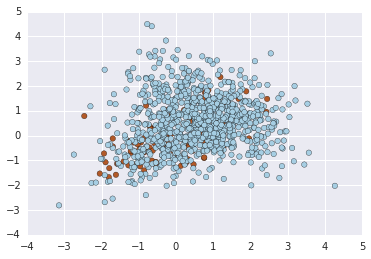

In [179]:
plt.figure()
plt.scatter(features[:, 0], features[:, 1], s=30, c=label, cmap=plt.cm.Paired)
plt.show()